# Pandas - Toxic Comments EDA

Наша цель провести первичный анализ данных текущего соревнования на Kaggle [Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

Данные можно скачать тут - https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [1]:
#basics
import pandas as pd 
import numpy as np

### Load data

Загружаем датасет:

In [7]:
train = pd.read_csv('train.csv')

`train` это [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). 


### First look

Давайте взглянем на данные:

In [8]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
train.shape

(159571, 8)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Можем смотреть отдельно на каждую колонку, тогда мы будем работать с [Pandas Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html):

In [15]:
train['toxic'].sample(10)

59904     0
50319     0
88179     0
114125    0
57875     1
31100     0
41861     0
117705    0
61987     0
59246     1
Name: toxic, dtype: int64

In [16]:
train['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [40]:
train['toxic'].value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

Clean

Индексация DataFrame:

In [41]:
train.iloc[:5,2:]

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0,0,0,0,0,0,False
1,0,0,0,0,0,0,False
2,0,0,0,0,0,0,False
3,0,0,0,0,0,0,False
4,0,0,0,0,0,0,False


Агрегации:

In [42]:
x = train.iloc[:,2:].sum()
x

toxic            15294.0
severe_toxic      1595.0
obscene           8449.0
threat             478.0
insult            7877.0
identity_hate     1405.0
clean                0.0
dtype: float64

In [43]:
rowsums=train.iloc[:,2:].sum(axis=1)

Создадим новую фичу:

In [44]:
train['clean']=(rowsums==0)

In [45]:
#count number of clean entries
print("Total comments = ", len(train))
print("Total clean comments = ", train['clean'].sum())
print("Total tags =", x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098.0


### Clean data

In [46]:
train.isnull().head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [47]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
filling NA with "unknown"


### Vizalization

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [49]:
x

toxic            15294.0
severe_toxic      1595.0
obscene           8449.0
threat             478.0
insult            7877.0
identity_hate     1405.0
clean                0.0
dtype: float64

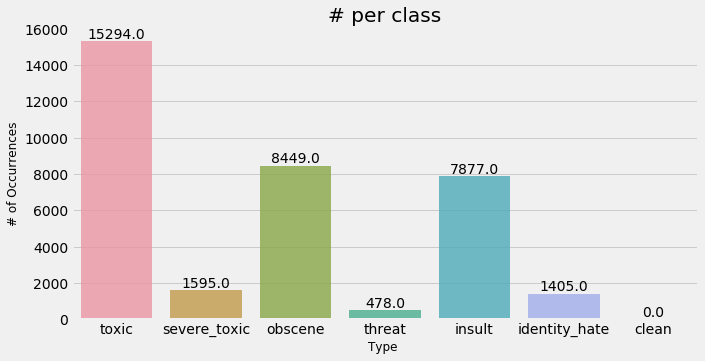

In [50]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### Multi tagging

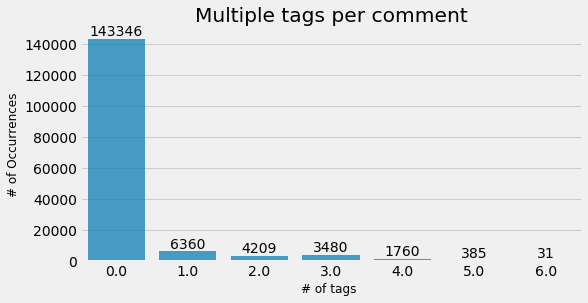

In [51]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
color = sns.color_palette()
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[0])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### Coorelation

In [52]:
temp_df=train.iloc[:,2:-1]

In [53]:
temp_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


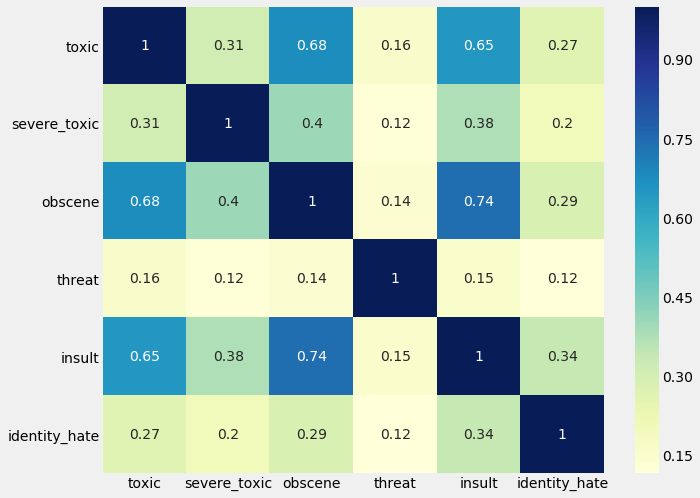

In [55]:
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

Crosstab:

In [56]:
pd.crosstab(temp_df['insult'], temp_df['obscene'])

obscene,0,1
insult,,
0,149400,2294
1,1722,6155


In [57]:
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)

In [58]:
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  144277     0  143754   523  144248   29  143744   533   
1                   13699  1595    7368  7926   14845  449    7950  7344   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   144174   103  
1                    13992  1302

### Let's read comments :)

In [59]:
pd.options.display.max_colwidth = -1

In [60]:
train[train.toxic==1].sample(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
81131,d900dcc7deb5762c,"BitchBuss \n\nOne more sticking of your nose, and you'll lose it !",1,0,0,0,0,0,False
128036,acd0d77565fb6779,"What shit u talk to me, communist rat?",1,0,1,0,1,1,False


In [76]:
print("severe_toxic: \n")
print(train[train.severe_toxic==1]['comment_text'].sample(1).iloc[0])

severe_toxic: 

Why don't you go fuck your mom  05:52, 26 Jun 2005 (UTC)


In [77]:
print("threat: \n")
print(train[train.threat==1]['comment_text'].sample(1).iloc[0])

threat: 

FUCK USER JUJUBE!FUCK WIKIPEDIA!DESTROY USER JUJUBE!DESTROY WIKIPEDIA!DEATH TO USER JUJUBE!
FUCK USER JUJUBE!FUCK WIKIPEDIA!DESTROY USER JUJUBE!DESTROY WIKIPEDIA!DEATH TO USER JUJUBE!
FUCK USER JUJUBE!FUCK WIKIPEDIA!DESTROY USER JUJUBE!DESTROY WIKIPEDIA!DEATH TO USER JUJUBE!
FUCK USER JUJUBE!FUCK WIKIPEDIA!DESTROY USER JUJUBE!DESTROY WIKIPEDIA!DEATH TO USER JUJUBE!


### Wordcloud

In [78]:
#!pip install wordcloud

In [79]:
from wordcloud import WordCloud ,STOPWORDS

In [85]:
sample=train[train.toxic==1]

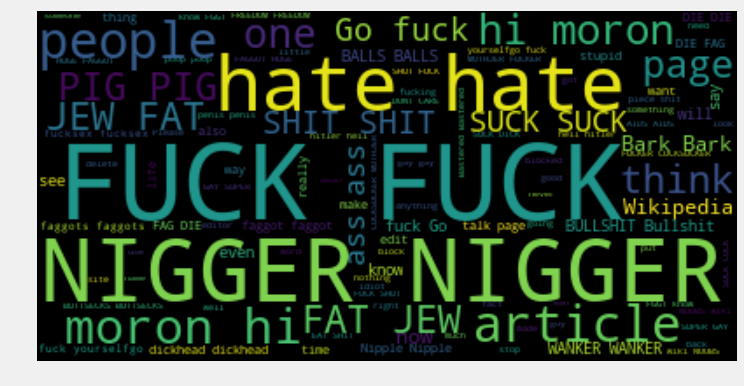

In [86]:
text=sample.comment_text.values

wc= WordCloud(max_font_size=60, background_color="black",max_words=2000,stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17),
           interpolation="bilinear")
plt.show()

### Feature engineering:

In [87]:
import re
import string

Создадим новую фичу "количетво предложений" в комментарии:

In [97]:
train['count_sent']=train["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

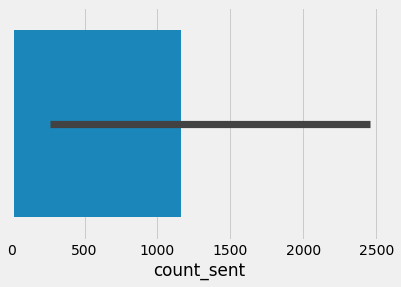

In [98]:
sns.barplot  ( train['count_sent'].value_counts() ) 

In [99]:
train[:2]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count_sent
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,True,2
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,True,1


И еще немного новых фич:

In [100]:
train['count_word']=train["comment_text"].apply(lambda x: len(str(x).split()))
#Unique word count
train['count_unique_word']=train["comment_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
train['count_letters']=train["comment_text"].apply(lambda x: len(str(x)))
#punctuation count
train["count_punctuations"] =train["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
train["count_words_upper"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
train["count_words_title"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
train["count_stopwords"] = train["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
#Average length of the words
train["mean_word_len"] = train["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [101]:
#derived features
#Word count percent in each comment:
train['word_unique_percent']=train['count_unique_word']*100/train['count_word']
#derived features
#Punct percent in each comment:
train['punct_percent']=train['count_punctuations']*100/train['count_word']

### Cut long tails

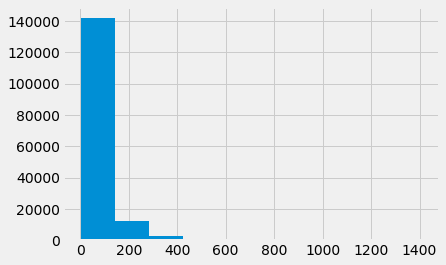

In [103]:
train['count_word'].hist()

In [104]:
train['count_word'].max()

1411

***!!! Так делать не нужно:***

In [42]:
train['count_word'].loc[train['count_word']>200] = 200

/Users/jenya/miniconda3/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


***Нужно так:***

In [105]:
train.loc[train['count_word']>200, 'count_word'] = 200

In [106]:
train['count_word'].max()

200

In [107]:
train.loc[train['count_sent']>10, 'count_sent'] = 10 

In [108]:
train.loc[train['count_unique_word']>200, 'count_unique_word'] = 200

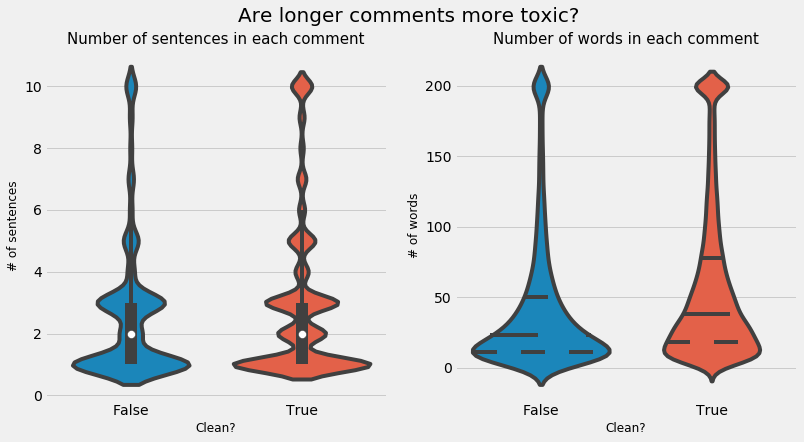

In [116]:
plt.figure(figsize=(12,6))
## sentenses
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y='count_sent',x='clean', data=train, split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)
# words
plt.subplot(122)
sns.violinplot(y='count_word',x='clean', data=train, split=True, inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

### Spammers

Посмотрим как распределены спам коментарии

In [119]:
#spammers - comments with less than 40% unique words
spammers=train[train['word_unique_percent']<40]

In [120]:
print("Clean Spam example:")
print(spammers[spammers.clean==1].comment_text.iloc[1])

Clean Spam example:
Other Bush articles not referenced in George W. Bush
None of the following articles is mentioned in the George W. Bush and perhaps should be:
 Bush's Brain: How Karl Rove Made George W. Bush Presidential
 Domestic policy of the George W. Bush administration
 Early life of George W. Bush
 Economic policy of the George W. Bush administration
 Electoral history of George W. Bush
 Fictionalized portrayals of George W. Bush
 Foreign policy of the George W. Bush administration
 George W. Bush and the Iraq War
 George W. Bush as Governor of Texas
 George W. Bush Cabinet
 George W. Bush presidential campaign
 George W. Bush presidential campaign, 2000
 George W. Bush Presidential Library
 George W. Bush pretzel incident
 George W. Bush substance abuse controversy
 George W. Bush Supreme Court candidates
 George W. Bush's first term as President of the United States
 George W. Bush's second term as President of the United States
 List of books and films about George W. Bush


In [122]:
print("Toxic Spam example:")
print(spammers[spammers.toxic==1].comment_text.iloc[2])

Toxic Spam example:
YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER 

In [123]:
#For the desired plots , the data must be in long format
temp_df = pd.melt(train, value_vars=['count_word', 'count_unique_word'], id_vars='clean')

temp_df.head()

,clean,variable,value
0,True,count_word,43
1,True,count_word,17
2,True,count_word,42
3,True,count_word,113
4,True,count_word,13


In [124]:
import matplotlib.gridspec as gridspec 

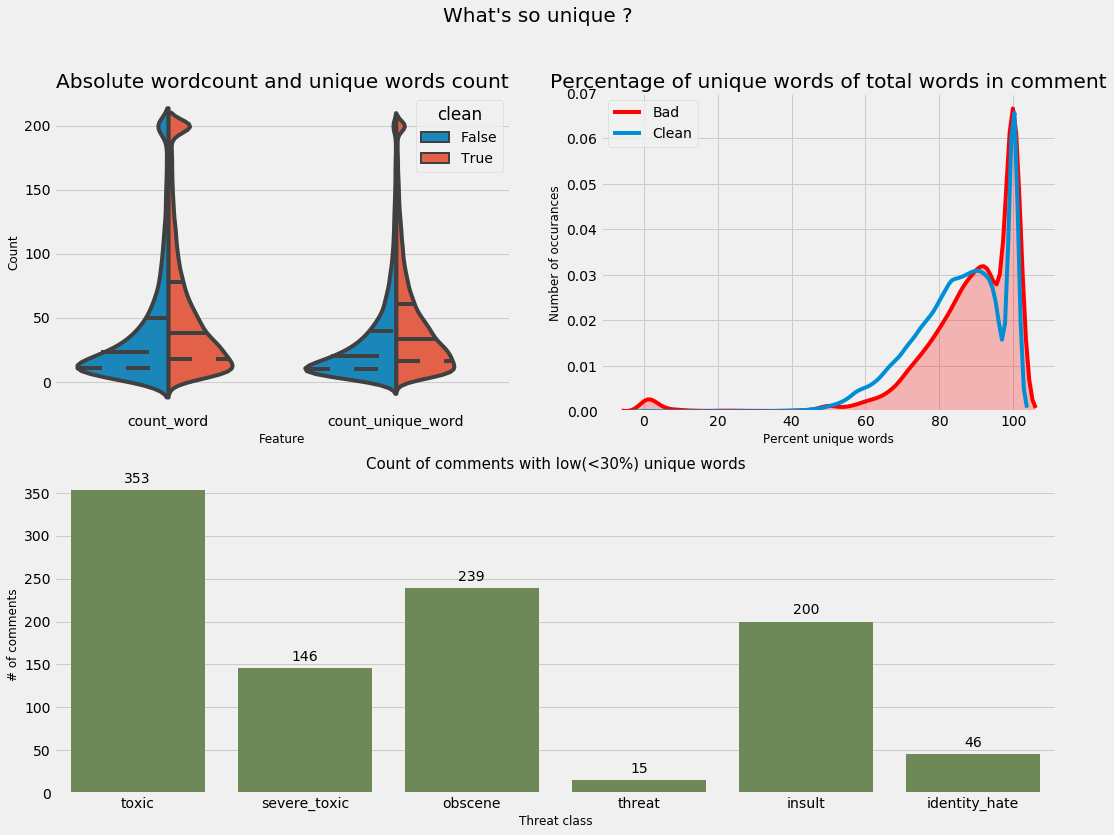

In [125]:
plt.figure(figsize=(16,12))
plt.suptitle("What's so unique ?",fontsize=20)
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.violinplot(x='variable', y='value', hue='clean', data=temp_df, split=True,inner='quartile')
plt.title("Absolute wordcount and unique words count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot2grid((2,2),(0,1))
plt.title("Percentage of unique words of total words in comment")
#sns.boxplot(x='clean', y='word_unique_percent', data=train_feats)
ax=sns.kdeplot(train[train.clean == 0].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(train[train.clean == 1].word_unique_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)

x=spammers.iloc[:,2:8].sum()
plt.subplot2grid((2,2),(1,0),colspan=2)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color=color[3])

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.xlabel('Threat class', fontsize=12)
plt.ylabel('# of comments', fontsize=12)
plt.show()

**Вывод: спамеры пишут более "токсичные" комментарии. Это будет хорошей фичей для ML**